In [2]:
import numpy as np
import math

def TPS_F( i , j ):
  if abs( i - j ) == 1 :
    return  (y[i] - y[j]) / (x[i] - x[j])
  else :
    return ( TPS_F(i + 1 , j) - TPS_F(i , j - 1 ) ) / (x[j] - x[i])
  

def TPS_B ( i , j ):
  if abs( i - j ) == 1 :
    return  (y[j] - y[i])
  else :
    return TPS_B(i + 1 , j) - TPS_B(i , j - 1 ) 
  

In [3]:
# x = [3.2 , 3.5 , 3.7 , 3.8 , 4.1]
# y = [30.3222 , 40.5807 , 48.5752 , 52.9341 , 67.5127]

# x = [1.3 , 1.6 , 1.8 , 2]
# y = [4.1825 , 5.0324 , 5.7984 , 6.7516]

# x = [1.2 , 1.4 , 1.6  , 1.8 , 2 , 2.2]
# y = [2.6158  , 3.1604 , 4.0245 , 5.2754 , 6.9804 , 9.2062]
x = np.array([10, 15, 20, 25, 30])
y = np.array([0.1736, 0.2588, 0.3420, 0.4226, 0.5])


n = len(x)
x = np.array(x)
def Forward_Different():
  forward_vector = [y[0]]
  for step in range(1, n ):
    forward_vector.append(TPS_F(0 , step))
  return(np.array(forward_vector))

def Backward_Different():
  backward_vector = [y[0]]
  for step in range(1, n ):
    backward_vector.append(TPS_B(0 , step) / math.factorial(step ))
  return(np.array(backward_vector))

Backward_Different()

array([ 1.73600000e-01,  8.52000000e-02, -1.00000000e-03, -1.00000000e-04,
        1.50342701e-17])

In [4]:
x_iterator = np.arange(n - 1)
print(x_iterator)

def Different_Table(x = x):
  matrix_multi = np.zeros((n  , n ))
  matrix_multi[1: , 0] = -x[:n-1]
  matrix_multi[1: , 1] = 1
  matrix_multi[0 , 0] = 1
  for row in range(2 , n, 1):
    temp = np.zeros(n)
    for i in range(n):
      for j in range(n - i):
        temp[i+j] += matrix_multi[row - 1][i] * matrix_multi[row][j]
    matrix_multi[row] = temp

  matrix_multi = matrix_multi[: , ::-1]
  return matrix_multi


Different_Table(x = x_iterator)

[0 1 2 3]


array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1., -1.,  0.],
       [ 0.,  1., -3.,  2.,  0.],
       [ 1., -6., 11., -6.,  0.]])

In [ ]:
def Compute_result_vector_forward():
    print(f"Vector ti phan sai : \n {Forward_Different()} ")
    print(f"Ma tran tich : \n {Different_Table()}")
    print(f"Ket qua he so bat dau tu x^n-1 : \n {(Forward_Different().T * Different_Table().T).T.sum(axis= 0)}")

def Compute_result_vector_backward():
    print(f"Vector ti phan sai : \n {Backward_Different()} ")
    print(f"Ma tran tich : \n {Different_Table(x = x_iterator)}")
    print(f"Ket qua he so bat dau tu x^n-1 : \n {(Backward_Different().T * Different_Table(x = x_iterator).T).T.sum(axis= 0)}")

def get_result_backward():
    return (Backward_Different().T * Different_Table(x = x_iterator).T).T.sum(axis= 0)

def get_result_forward():
    return (Forward_Different().T * Different_Table().T).T.sum(axis= 0)

# Compute_result_vector_forward()


Vector ti phan sai : 
 [ 1.06460000e+02  1.66200000e+00 -3.79000000e-02  3.11500000e-03
 -8.97916667e-05] 
Ma tran tich : 
 [[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00 -1.000e+01]
 [ 0.000e+00  0.000e+00  1.000e+00 -2.500e+01  1.500e+02]
 [ 0.000e+00  1.000e+00 -4.500e+01  6.500e+02 -3.000e+03]
 [ 1.000e+00 -7.000e+01  1.775e+03 -1.925e+04  7.500e+04]]
Ket qua he so bat dau tu x^n-1 : 
 [-8.97916667e-05  9.40041667e-03 -3.37455208e-01  6.36273958e+00
  6.80756250e+01]


In [14]:
def compute_value_backward( x_value) :
    func = get_result_backward()
    n = len(func)
    sum = 0
    for i  in range(n):
        sum += func[i] * pow(x_value , n - i - 1)
    return sum 

def compute_value_backward_grad( x_value) :
    func = get_result_backward()
    n = len(func)
    sum = 0
    for i  in range( n - 1):
        sum += func[i] * pow(x_value , n - i - 2) * (n - i - 1)
    return sum/(abs(x[0] - x[1]))

def compute_value_forward( x_value) :
    func = get_result_forward()
    n = len(func)
    sum = 0
    for i  in range(n):
        sum += func[i] * pow(x_value , n - i - 1)
    return sum 

def compute_value_forward_grad( x_value) :
    func = get_result_forward()
    n = len(func)
    sum = 0
    for i  in range(n - 1):
        sum += func[i] * pow(x_value , n - i - 2) * (n - i - 1)
        print(func[i])
    return sum

print("Forward")
print(compute_value_forward( 12))
# print(compute_value_forward_grad( 12.5))
print("Backward")
print(compute_value_backward( 12))
# print(compute_value_backward_grad( 12.5))


Forward
110.21694999999997
Backward
-6749.830000000014


## 2. Lagrange


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# input data 
x = np.array(  [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990] )
y = np.array( [106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46] )


def L_i ( i , value ) :
    n = len(x)
    L = 1
    for j in range(n):
        if j != i :
            L *= (value - x[j]) / (x[i] - x[j])
    return L

def compute(x_value):
    n = len(x)
    sum = 0
    for i in range(n):
        sum += y[i] * L_i(i , x_value)
    return sum

print(compute(2000))

175.08000000000197


In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Interpolation')

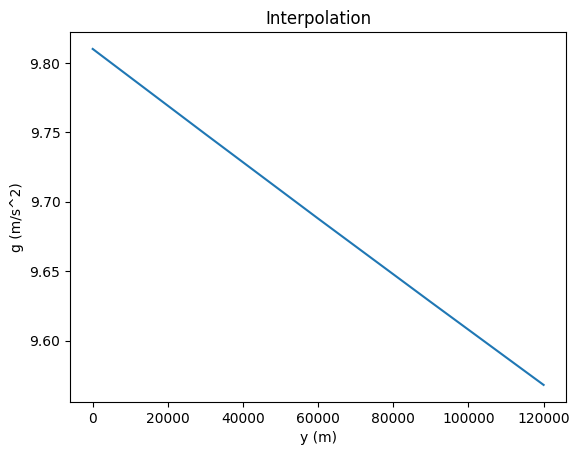

In [9]:
%matplotlib inline
y_test = np.array([0, 30000, 60000, 90000, 120000]
)
g_test = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682] 
)


plt.plot(y_test , g_test  , label = 'Data')
plt.xlabel('y (m)')
plt.ylabel('g (m/s^2)')
plt.title('Interpolation')